In [1]:
import pandas as pd

# Path to large JSON file
json_file = 'yelp_academic_dataset_review.json'
csv_file = 'yelp_reviews_10k.csv'

# Read the first 10,000 lines
chunksize = 10000  # Number of lines to read
data = pd.read_json(json_file, lines=True, chunksize=chunksize)

# Get the first chunk
df = next(data)

# Optionally filter columns
df = df[['review_id', 'user_id', 'business_id', 'stars', 'date', 'text']]

# Save to CSV
df.to_csv(csv_file, index=False)

print(f"✅ Saved first 10,000 reviews to: {csv_file}")


✅ Saved first 10,000 reviews to: yelp_reviews_10k.csv


In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Set seaborn style
sns.set_style('darkgrid')
yelp_reviews = pd.read_csv('yelp_reviews_10k.csv')
yelp_reviews.head()

,review_id,user_id,business_id,stars,date,text
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,2018-07-07 22:09:11,"If you decide to eat here, just be aware it is..."
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,2012-01-03 15:28:18,I've taken a lot of spin classes over the year...
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,2014-02-05 20:30:30,Family diner. Had the buffet. Eclectic assortm...
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,2015-01-04 00:01:03,"Wow! Yummy, different, delicious. Our favo..."
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,2017-01-14 20:54:15,Cute interior and owner (?) gave us tour of up...


In [239]:
yelp_reviews.tail()

,review_id,user_id,business_id,stars,date,text
9995,ZcBtCA9jGhLfakf1jJ2BAg,yab1cq5yzrTHzoyz8LYqYQ,1-z7wd860Rii4kbEMCT8DA,5,2018-06-26 17:41:31,Excellent food and service. The place is funct...
9996,UIkEO-10J6Y99IhRqUflvg,lYAmgL_l7A3MPFYe1DYKrw,EpREWeEpmR8f1qLHzzF0AA,5,2018-01-09 20:26:13,Just about to get tucked into a meatloaf that ...
9997,S-NQM3Axcg8JS3MXHUIvyw,rE2WwfgJbYfvDwBlgq__dQ,dvidzWEPgTQPeBc8CUV2OQ,5,2015-04-01 21:50:28,Outstanding customer service! And my car is dr...
9998,ME79YrEhm2xe4IQy_0zkGw,OnIklvzKDpk1BduC84TrTA,2XYPFRm7teCUr3eGsB2-qw,5,2015-06-08 19:32:26,I and my husband went here for Dinner one day ...
9999,05oKtleZ-JFGD6qt47VQcg,p0MhNWkwOPBfRo8qUb7faw,rnaE88k8yV5pFAGJeiIK4Q,2,2015-08-06 23:16:58,I saw Big Data when they came to town at the K...


In [241]:
yelp_reviews.describe()

,stars
count,10000.000000
mean,3.854300
std,1.346719
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [243]:
yelp_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    10000 non-null  object
 1   user_id      10000 non-null  object
 2   business_id  10000 non-null  object
 3   stars        10000 non-null  int64 
 4   date         10000 non-null  object
 5   text         10000 non-null  object
dtypes: int64(1), object(5)
memory usage: 468.9+ KB


In [245]:
print(yelp_reviews['text'][0])

If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. 

The food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.


In [247]:
yelp_reviews['length'] = yelp_reviews['text'].apply(len)

In [249]:
yelp_reviews

,review_id,user_id,business_id,stars,date,text,length
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,2018-07-07 22:09:11,"If you decide to eat here, just be aware it is...",513
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,2012-01-03 15:28:18,I've taken a lot of spin classes over the year...,829
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,2014-02-05 20:30:30,Family diner. Had the buffet. Eclectic assortm...,339
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,2015-01-04 00:01:03,"Wow! Yummy, different, delicious. Our favo...",243
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,2017-01-14 20:54:15,Cute interior and owner (?) gave us tour of up...,534
...,...,...,...,...,...,...,...
9995,ZcBtCA9jGhLfakf1jJ2BAg,yab1cq5yzrTHzoyz8LYqYQ,1-z7wd860Rii4kbEMCT8DA,5,2018-06-26 17:41:31,Excellent food and service. The place is funct...,156
9996,UIkEO-10J6Y99IhRqUflvg,lYAmgL_l7A3MPFYe1DYKrw,EpREWeEpmR8f1qLHzzF0AA,5,2018-01-09 20:26:13,Just about to get tucked into a meatloaf that ...,92
9997,S-NQM3Axcg8JS3MXHUIvyw,rE2WwfgJbYfvDwBlgq__dQ,dvidzWEPgTQPeBc8CUV2OQ,5,2015-04-01 21:50:28,Outstanding customer service! And my car is dr...,763
9998,ME79YrEhm2xe4IQy_0zkGw,OnIklvzKDpk1BduC84TrTA,2XYPFRm7teCUr3eGsB2-qw,5,2015-06-08 19:32:26,I and my husband went here for Dinner one day ...,390


In [235]:
!pip install wordcloud
!pip install textblob

In [251]:
import nltk
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from textblob import TextBlob
import re

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

yelp_reviews['clean_review'] = yelp_reviews['text'].apply(clean_text)
yelp_reviews['text'].head(5)

0    If you decide to eat here, just be aware it is...
1    I've taken a lot of spin classes over the year...
2    Family diner. Had the buffet. Eclectic assortm...
3    Wow!  Yummy, different,  delicious.   Our favo...
4    Cute interior and owner (?) gave us tour of up...
Name: text, dtype: object

In [253]:
yelp_reviews['clean_review'].head(5)

0    if you decide to eat here just be aware it is ...
1    ive taken a lot of spin classes over the years...
2    family diner had the buffet eclectic assortmen...
3    wow  yummy different  delicious   our favorite...
4    cute interior and owner  gave us tour of upcom...
Name: clean_review, dtype: object

In [255]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')

len(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sarayu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


198

In [257]:
# Defining a function for removing stop words
def removing_stopwords(message):
    Text_clean = []
    
    for word in message.split():
        if word.lower() not in stopwords.words('english'):
            Text_clean.append(word)

    return Text_clean

In [259]:
#yelp_reviews['clean_stopwords_review'] = yelp_reviews['text'].apply(removing_stopwords)
#yelp_reviews.head()
clean_stopwords_review = yelp_reviews['clean_review'].apply(removing_stopwords)
clean_stopwords_review[9995]

['excellent',
 'food',
 'service',
 'place',
 'functional',
 'funky',
 'time',
 'great',
 'choices',
 'breakfast',
 'lunch',
 'welcoming',
 'environment',
 'staff']

In [261]:
# Sentiment analysis using TextBlob
yelp_reviews['polarity'] = yelp_reviews['clean_review'].apply(lambda x: TextBlob(x).sentiment.polarity)
yelp_reviews['sentiment'] = yelp_reviews['polarity'].apply(lambda x: 'positive' if x > 0.2 else 'negative' if x < -0.2 else 'neutral')

yelp_reviews.head()
yelp_reviews[['clean_review', 'stars', 'polarity','sentiment']]

,clean_review,stars,polarity,sentiment
0,if you decide to eat here just be aware it is ...,3,0.085278,neutral
1,ive taken a lot of spin classes over the years...,5,0.395455,positive
2,family diner had the buffet eclectic assortmen...,3,0.139935,neutral
3,wow yummy different delicious our favorite...,5,0.279545,positive
4,cute interior and owner gave us tour of upcom...,4,0.392041,positive
...,...,...,...,...
9995,excellent food and service the place is functi...,5,0.600000,positive
9996,just about to get tucked into a meatloaf that ...,5,0.600000,positive
9997,outstanding customer service and my car is dri...,5,0.059233,neutral
9998,i and my husband went here for dinner one day ...,5,0.343750,positive


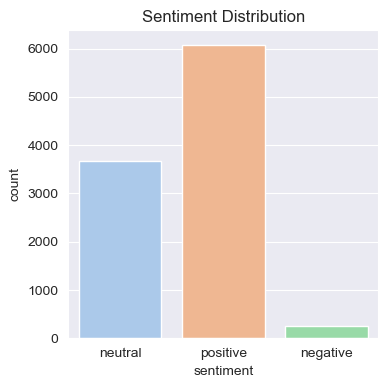

In [263]:
# Visualize sentiment distribution
plt.figure(figsize=(4, 4))
#sns.countplot(data=yelp_reviews, x='sentiment', palette='pastel')
sns.countplot(data=yelp_reviews, x='sentiment', hue='sentiment', palette='pastel', legend=False)

plt.title('Sentiment Distribution')
plt.show()

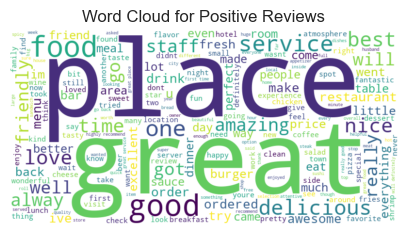

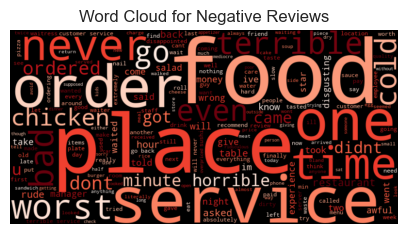

In [265]:
# Word cloud for positive reviews
positive_text = ' '.join(yelp_reviews[yelp_reviews['sentiment'] == 'positive']['clean_review'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(5, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

# Word cloud for negative reviews
negative_text = ' '.join(yelp_reviews[yelp_reviews['sentiment'] == 'negative']['clean_review'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

plt.figure(figsize=(5, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

Text(0, 0.5, 'Number of Reviews')

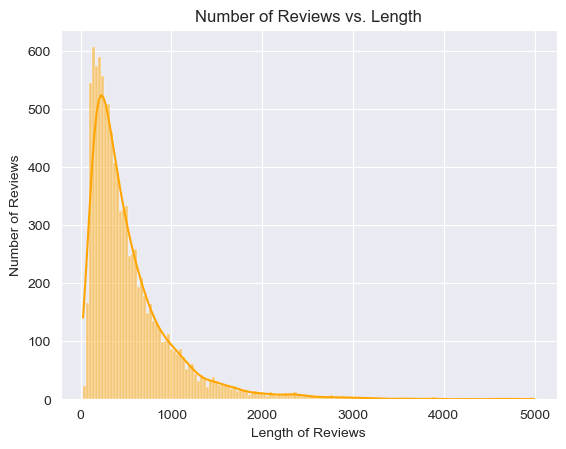

In [267]:
sns.histplot(yelp_reviews['length'], bins=150, color='orange', kde=True)
plt.title("Number of Reviews vs. Length")
plt.xlabel("Length of Reviews")
plt.ylabel("Number of Reviews")

<Axes: xlabel='stars', ylabel='count'>

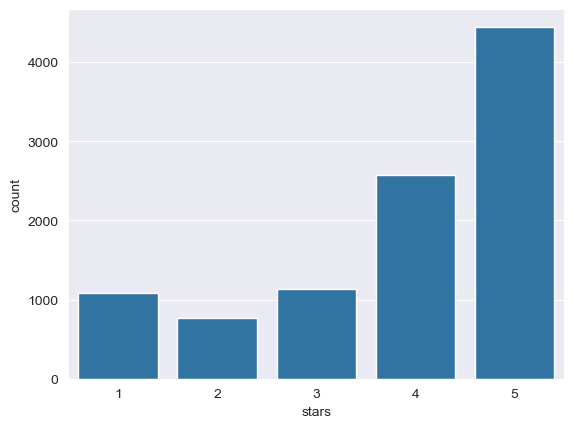

In [269]:
sns.countplot(x = 'stars', data = yelp_reviews)

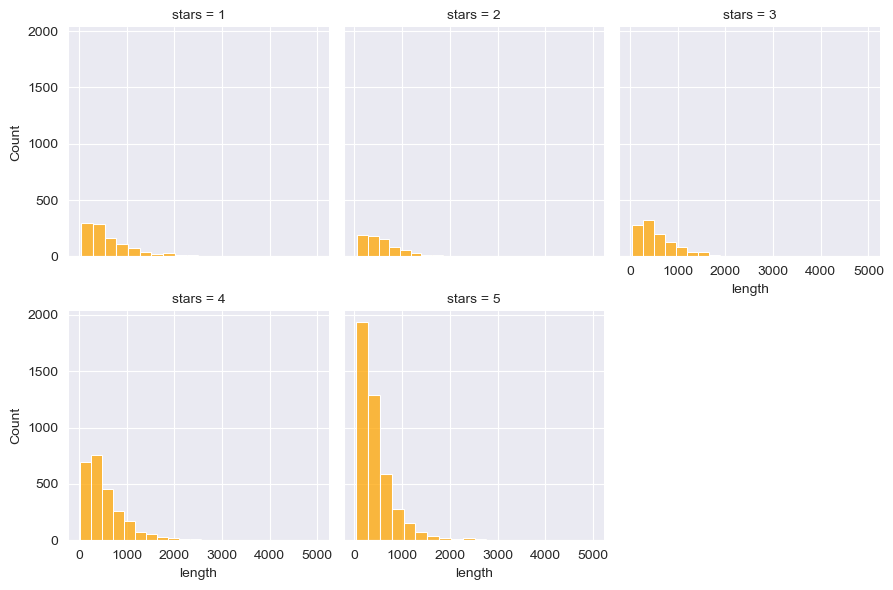

In [271]:
facet = sns.FacetGrid(data = yelp_reviews, col = 'stars', col_wrap = 3)
facet.map(sns.histplot, 'length', bins = 20, color = 'orange')

In [273]:
# TF-IDF Vectorization and logistic regression for prediction
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(yelp_reviews['clean_review'])
y = yelp_reviews['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report).transpose()
report_df.head()

,precision,recall,f1-score,support
1,0.718954,0.687500,0.702875,320.0
2,0.575000,0.096639,0.165468,238.0
3,0.362500,0.177370,0.238193,327.0
4,0.424284,0.418573,0.421409,743.0
5,0.666099,0.854956,0.748803,1372.0


In [275]:
# logistic regression - Balanced
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(yelp_reviews['clean_review'])
y = yelp_reviews['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report).transpose()
report_df.head()

,precision,recall,f1-score,support
1,0.611825,0.743750,0.671368,320.0
2,0.360870,0.348739,0.354701,238.0
3,0.343575,0.376147,0.359124,327.0
4,0.461039,0.477793,0.469266,743.0
5,0.778132,0.710641,0.742857,1372.0


In [21]:
yelp_reviews.length.describe()

count    10000.000000
mean       549.039100
std        504.435838
min         26.000000
25%        224.000000
50%        395.000000
75%        694.250000
max       4994.000000
Name: length, dtype: float64

In [277]:
yelp_reviews_1star = yelp_reviews[yelp_reviews['stars'] == 1]

In [279]:
yelp_reviews_1star

,review_id,user_id,business_id,stars,date,text,length,clean_review,polarity,sentiment
5,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1,2015-09-23 23:10:31,I am a long term frequent customer of this est...,341,i am a long term frequent customer of this est...,0.211111,positive
47,TcCcHzc3L6Aboq3DteEfZA,OuatwND396ZQxm2zK8WlUQ,jNL5KUPz2-tHUJM__ysSaw,1,2014-08-24 20:14:12,If you want to pay for everything a la carte t...,1016,if you want to pay for everything a la carte t...,0.046667,neutral
64,qdzNocGBnh8U-cvE_N8qbA,Fq7d14GDAsGjDoojP_ygOQ,pAgtmlIGqFYaWdBoCUeitw,1,2012-12-04 02:40:49,The TV shows are $4.99 and they have commercia...,298,the tv shows are and they have commercials wh...,-0.008333,neutral
73,PDHRlnEdkEcwATry4w71PQ,UsBxLh14sUpO8SdeqIiGOA,Wy8Hswf2cLQGRZN6armkag,1,2011-08-24 23:07:08,"If I could give it a zero, I would. I order a ...",712,if i could give it a zero i would i order a pl...,-0.092208,neutral
79,5obXxR0b94b5q6j1zYCAzw,3inG_FUhm28tUJc0zZ2fCg,aY_n9RSaD2Yw09jSFFePew,1,2017-08-16 15:43:19,We visited once and were very disappointed in ...,315,we visited once and were very disappointed in ...,-0.325000,negative
...,...,...,...,...,...,...,...,...,...,...
9949,S8FLvcKGWctZffPxd1mcAQ,-U-bPA7TKaOw6iti7RRC4g,Z4Yfcktc-2RhNprA6l35lg,1,2016-01-30 05:02:25,Short and sweet - Been here three times and ha...,546,short and sweet been here three times and hav...,0.156061,neutral
9956,ajGV47J_Wm_k_W_veLobsg,Ju_XxaZU3gboBf6dW0DyWw,clOOOBYvd1aUcFxA9uhFjQ,1,2018-03-16 02:19:05,Worst service ever. \nAfter waiting 45 mins c...,431,worst service ever \nafter waiting mins call...,-0.430769,negative
9967,vpg73DD3-K0UFs62p6gXvA,UC9mlKHpPX4V41rnoBP3_g,jfIWqMrdWnPNORcDnQ7VNg,1,2017-03-15 02:20:45,We ate here tonight. The lettuce on my wife's ...,267,we ate here tonight the lettuce on my wifes sa...,-0.140000,neutral
9974,6SYkz5LhIB2dAx7NUZ6w3A,B-FdHQZLm73h5G9tTbLy7w,UEgiQRvpAeaq-QyEvm7Ysw,1,2016-07-25 16:55:17,We wanted salad for lunch so decided to try th...,465,we wanted salad for lunch so decided to try th...,0.088005,neutral


In [281]:
yelp_reviews_5star = yelp_reviews[yelp_reviews['stars'] == 5]
yelp_reviews_5star

,review_id,user_id,business_id,stars,date,text,length,clean_review,polarity,sentiment
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,2012-01-03 15:28:18,I've taken a lot of spin classes over the year...,829,ive taken a lot of spin classes over the years...,0.395455,positive
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,2015-01-04 00:01:03,"Wow! Yummy, different, delicious. Our favo...",243,wow yummy different delicious our favorite...,0.279545,positive
6,6AxgBCNX_PNTOxmbRSwcKQ,r3zeYsv1XFBRA4dJpL78cw,gmjsEdUsKpj9Xxu6pdjH0g,5,2015-01-03 23:21:18,Loved this tour! I grabbed a groupon and the p...,804,loved this tour i grabbed a groupon and the pr...,0.272090,positive
7,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5,2015-08-07 02:29:16,Amazingly amazing wings and homemade bleu chee...,192,amazingly amazing wings and homemade bleu chee...,0.505556,positive
10,rGQRf8UafX7OTlMNN19I8A,1WHRWwQmZOZDAhp2Qyny4g,uMvVYRgGNXf5boolA9HXTw,5,2015-06-21 14:48:06,My experience with Shalimar was nothing but wo...,1009,my experience with shalimar was nothing but wo...,0.298500,positive
...,...,...,...,...,...,...,...,...,...,...
9993,wDYXODwk2maHz9_IZe5IyA,jlxneprZ6nQdRRctZ556_g,vLT1KtrA9bWvjFOg-0xVIg,5,2016-09-18 19:26:42,"Best pizza in town. Staff is always friendly, ...",330,best pizza in town staff is always friendly es...,0.390152,positive
9995,ZcBtCA9jGhLfakf1jJ2BAg,yab1cq5yzrTHzoyz8LYqYQ,1-z7wd860Rii4kbEMCT8DA,5,2018-06-26 17:41:31,Excellent food and service. The place is funct...,156,excellent food and service the place is functi...,0.600000,positive
9996,UIkEO-10J6Y99IhRqUflvg,lYAmgL_l7A3MPFYe1DYKrw,EpREWeEpmR8f1qLHzzF0AA,5,2018-01-09 20:26:13,Just about to get tucked into a meatloaf that ...,92,just about to get tucked into a meatloaf that ...,0.600000,positive
9997,S-NQM3Axcg8JS3MXHUIvyw,rE2WwfgJbYfvDwBlgq__dQ,dvidzWEPgTQPeBc8CUV2OQ,5,2015-04-01 21:50:28,Outstanding customer service! And my car is dr...,763,outstanding customer service and my car is dri...,0.059233,neutral


In [285]:
yelp_reviews_1_5stars = pd.concat([yelp_reviews_1star, yelp_reviews_5star])
yelp_reviews_1_5stars

,review_id,user_id,business_id,stars,date,text,length,clean_review,polarity,sentiment
5,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1,2015-09-23 23:10:31,I am a long term frequent customer of this est...,341,i am a long term frequent customer of this est...,0.211111,positive
47,TcCcHzc3L6Aboq3DteEfZA,OuatwND396ZQxm2zK8WlUQ,jNL5KUPz2-tHUJM__ysSaw,1,2014-08-24 20:14:12,If you want to pay for everything a la carte t...,1016,if you want to pay for everything a la carte t...,0.046667,neutral
64,qdzNocGBnh8U-cvE_N8qbA,Fq7d14GDAsGjDoojP_ygOQ,pAgtmlIGqFYaWdBoCUeitw,1,2012-12-04 02:40:49,The TV shows are $4.99 and they have commercia...,298,the tv shows are and they have commercials wh...,-0.008333,neutral
73,PDHRlnEdkEcwATry4w71PQ,UsBxLh14sUpO8SdeqIiGOA,Wy8Hswf2cLQGRZN6armkag,1,2011-08-24 23:07:08,"If I could give it a zero, I would. I order a ...",712,if i could give it a zero i would i order a pl...,-0.092208,neutral
79,5obXxR0b94b5q6j1zYCAzw,3inG_FUhm28tUJc0zZ2fCg,aY_n9RSaD2Yw09jSFFePew,1,2017-08-16 15:43:19,We visited once and were very disappointed in ...,315,we visited once and were very disappointed in ...,-0.325000,negative
...,...,...,...,...,...,...,...,...,...,...
9993,wDYXODwk2maHz9_IZe5IyA,jlxneprZ6nQdRRctZ556_g,vLT1KtrA9bWvjFOg-0xVIg,5,2016-09-18 19:26:42,"Best pizza in town. Staff is always friendly, ...",330,best pizza in town staff is always friendly es...,0.390152,positive
9995,ZcBtCA9jGhLfakf1jJ2BAg,yab1cq5yzrTHzoyz8LYqYQ,1-z7wd860Rii4kbEMCT8DA,5,2018-06-26 17:41:31,Excellent food and service. The place is funct...,156,excellent food and service the place is functi...,0.600000,positive
9996,UIkEO-10J6Y99IhRqUflvg,lYAmgL_l7A3MPFYe1DYKrw,EpREWeEpmR8f1qLHzzF0AA,5,2018-01-09 20:26:13,Just about to get tucked into a meatloaf that ...,92,just about to get tucked into a meatloaf that ...,0.600000,positive
9997,S-NQM3Axcg8JS3MXHUIvyw,rE2WwfgJbYfvDwBlgq__dQ,dvidzWEPgTQPeBc8CUV2OQ,5,2015-04-01 21:50:28,Outstanding customer service! And my car is dr...,763,outstanding customer service and my car is dri...,0.059233,neutral


In [287]:
yelp_reviews_1_5stars.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5524 entries, 5 to 9998
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   review_id     5524 non-null   object 
 1   user_id       5524 non-null   object 
 2   business_id   5524 non-null   object 
 3   stars         5524 non-null   int64  
 4   date          5524 non-null   object 
 5   text          5524 non-null   object 
 6   length        5524 non-null   int64  
 7   clean_review  5524 non-null   object 
 8   polarity      5524 non-null   float64
 9   sentiment     5524 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 474.7+ KB


In [289]:
print("1-Star Reviews = ", round((len(yelp_reviews_1star) / len(yelp_reviews_1_5stars)) * 100, 2), "%")

print("5-Star Reviews = ", round((len(yelp_reviews_5star) / len(yelp_reviews_1_5stars)) * 100, 2), "%")


1-Star Reviews =  19.53 %
5-Star Reviews =  80.47 %


<Axes: xlabel='stars', ylabel='count'>

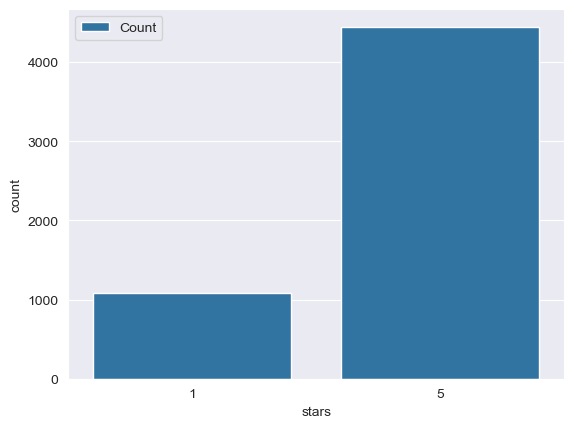

In [291]:
sns.countplot(x = yelp_reviews_1_5stars['stars'], data = yelp_reviews_1_5stars, label = 'Count')

In [297]:
import string
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [299]:
# Defining a function for removing punctuation
def removing_punc(message):
    Text_punc_removed = []
    
    
    for char in message:
        if char not in string.punctuation:
            Text_punc_removed.append(char)
    
    Text_punc_joined = "".join(Text_punc_removed)
    
    return Text_punc_joined
    
yelp_nopunc = yelp_reviews_1_5stars['text'].apply(removing_punc)

yelp_nopunc

5       I am a long term frequent customer of this est...
47      If you want to pay for everything a la carte t...
64      The TV shows are 499 and they have commercials...
73      If I could give it a zero I would I order a pl...
79      We visited once and were very disappointed in ...
                              ...                        
9993    Best pizza in town Staff is always friendly es...
9995    Excellent food and service The place is functi...
9996    Just about to get tucked into a meatloaf that ...
9997    Outstanding customer service And my car is dri...
9998    I and my husband went here for Dinner one day ...
Name: text, Length: 5524, dtype: object

In [301]:
# import nltk
# nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')

len(stopwords.words('english'))

198

In [305]:
# Defining a function for removing stop words
def removing_stopwords(message):
    Text_clean = []
    
    for word in message.split():
        if word.lower() not in stopwords.words('english'):
            Text_clean.append(word)

    return Text_clean

yelp_clean = yelp_nopunc.apply(removing_stopwords)
yelp_clean

5       [long, term, frequent, customer, establishment...
47      [want, pay, everything, la, carte, place, Food...
64      [TV, shows, 499, commercials, cheesy, way, mak...
73      [could, give, zero, would, order, plain, hambu...
79      [visited, disappointed, veggie, pizza, husband...
                              ...                        
9993    [Best, pizza, town, Staff, always, friendly, e...
9995    [Excellent, food, service, place, functional, ...
9996    [get, tucked, meatloaf, smelling, amazing, get...
9997    [Outstanding, customer, service, car, driving,...
9998    [husband, went, Dinner, one, day, work, enviro...
Name: text, Length: 5524, dtype: object

In [311]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
yelp_vectorizer = vectorizer.fit_transform([' '.join(i) for i in yelp_clean])

print(vectorizer.get_feature_names_out())

print(len(vectorizer.get_feature_names_out()))

yelp_vectorizer.shape

['00' '000' '007' ... 'öko' 'únicamente' '三杯鸡']
20734


(5524, 20734)

In [ ]:
#Our count vectorizer matix has 20734 unique words from 5524 reviews.

In [313]:

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
label = yelp_reviews_1_5stars['stars'].values

label




array([1, 1, 1, ..., 5, 5, 5])

In [315]:
NB_classifier.fit(yelp_vectorizer, label)

MultinomialNB()

In [317]:

sample = [input()]

testing_sample = vectorizer.transform(sample)

sample_predict = NB_classifier.predict(testing_sample)

sample_predict


 worst food


array([1])

In [319]:
#Training the Model with Naive Bayes
X = yelp_vectorizer
X.shape

(5524, 20734)

In [321]:
y = label
y.shape

(5524,)

In [323]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.naive_bayes import MultinomialNB

NB_classfier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [325]:
#Evaluating the Model  
from sklearn.metrics import classification_report, confusion_matrix
y_predict = NB_classifier.predict(X_train)
cm = confusion_matrix(y_train, y_predict)

<Axes: >

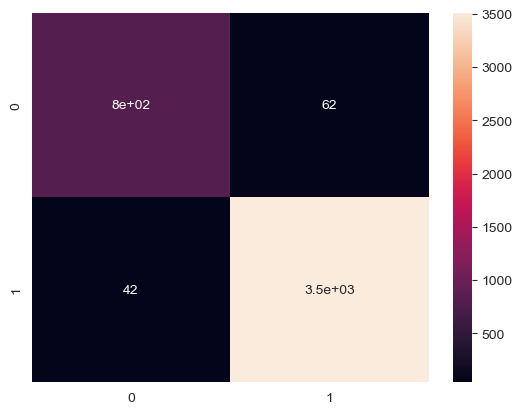

In [327]:
sns.heatmap(cm, annot = True)


In [329]:
print(classification_report(y_train, y_predict))

              precision    recall  f1-score   support

           1       0.95      0.93      0.94       866
           5       0.98      0.99      0.99      3553

    accuracy                           0.98      4419
   macro avg       0.97      0.96      0.96      4419
weighted avg       0.98      0.98      0.98      4419



<Axes: >

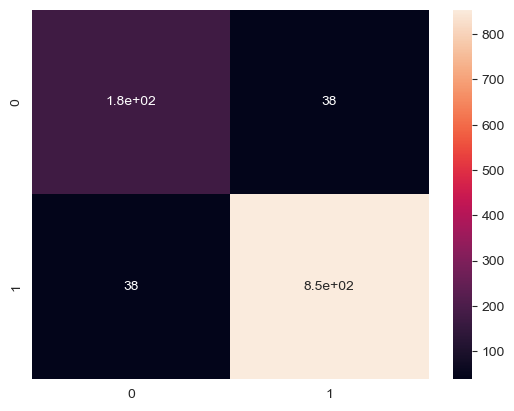

In [331]:
#Analyzing the testing data
y_predict_test = NB_classifier.predict(X_test)
cm2 = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm2, annot = True)

In [333]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           1       0.82      0.82      0.82       213
           5       0.96      0.96      0.96       892

    accuracy                           0.93      1105
   macro avg       0.89      0.89      0.89      1105
weighted avg       0.93      0.93      0.93      1105



In [335]:
from sklearn.feature_extraction.text import TfidfTransformer
yelp_tfidf = TfidfTransformer()
yelp_tfidf = yelp_tfidf.fit_transform(yelp_vectorizer)

yelp_tfidf.shape
print(yelp_tfidf)

  (0, 20605)	0.14968792832125974
  (0, 20164)	0.0977619934047035
  (0, 18749)	0.11359269217355875
  (0, 18688)	0.269662257997218
  (0, 18524)	0.14884458022008223
  (0, 18416)	0.24197377343776857
  (0, 18171)	0.10822753613291196
  (0, 14937)	0.08910718509973074
  (0, 14910)	0.22102824344522481
  (0, 13923)	0.06170417858673218
  (0, 12987)	0.09977022254272555
  (0, 12928)	0.15744549179787706
  (0, 12425)	0.09437945491491252
  (0, 11448)	0.14470574433378214
  (0, 10960)	0.116585223645755
  (0, 10183)	0.23180625127008891
  (0, 9379)	0.09771090630504765
  (0, 8591)	0.13351954102240463
  (0, 8330)	0.061626756017478766
  (0, 8178)	0.10367286001765745
  (0, 8161)	0.07901655358994741
  (0, 8104)	0.1469637413680222
  (0, 7843)	0.12437069999842283
  (0, 7824)	0.25740990839384964
  (0, 7725)	0.35115602849188865
  :	:
  (5523, 12601)	0.18871612909408556
  (5523, 12541)	0.20545506053406262
  (5523, 12450)	0.09885981635197365
  (5523, 11196)	0.1035874267959152
  (5523, 11036)	0.12680237106364178
  (5

In [337]:
X = yelp_tfidf
y = label
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [341]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)
y_predict2 = NB_classifier.predict(X_test)
# y_predict2

<Axes: >

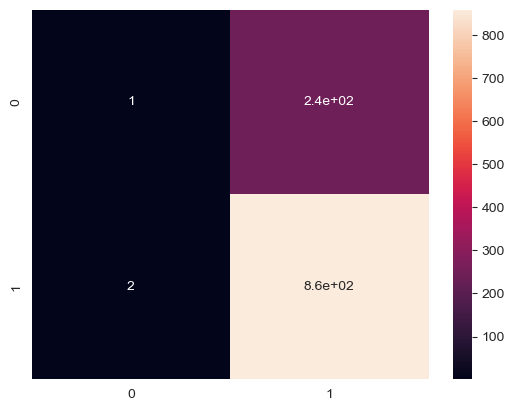

In [343]:
cm = confusion_matrix(y_test, y_predict2)
sns.heatmap(cm, annot = True)